<a href="https://colab.research.google.com/github/IvanStukalov/MLTechnologies/blob/lab_4/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1 Крайников И. А.


In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

from sklearn.model_selection import train_test_split
from seaborn import load_dataset

In [153]:
# Загрузка датасета
# https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv
ds = load_dataset('mpg')
df = ds.dropna()

In [154]:
from sklearn.preprocessing import LabelEncoder

# Создаем экземпляр LabelEncoder
encoder = LabelEncoder()

# Кодируем категориальный признак 'species'
df['origin'] = encoder.fit_transform(df['origin'])
df['name'] = encoder.fit_transform(df['name'])

/tmp/ipykernel_127232/3999872095.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['origin'] = encoder.fit_transform(df['origin'])
/tmp/ipykernel_127232/3999872095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = encoder.fit_transform(df['name'])


In [155]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,48
1,15.0,8,350.0,165.0,3693,11.5,70,2,35
2,18.0,8,318.0,150.0,3436,11.0,70,2,229
3,16.0,8,304.0,150.0,3433,12.0,70,2,13
4,17.0,8,302.0,140.0,3449,10.5,70,2,159


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 30.6 KB


<Axes: xlabel='weight', ylabel='cylinders'>

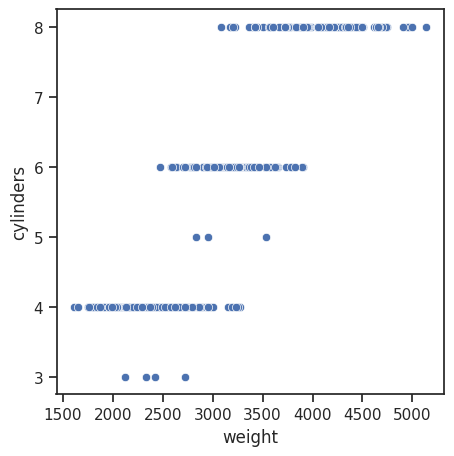

In [157]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(ax=ax, x='weight', y='cylinders', data=df)

In [158]:
# Выбор признаков
ds_x = df.drop('cylinders', axis = 1)
ds_y = df['cylinders']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(ds_x, ds_y, test_size=0.2, random_state=1)

### линейная регрессия

In [159]:

from sklearn.linear_model import LogisticRegression

reg1 = LogisticRegression().fit(ds_x, ds_y)
reg1

/home/cry1s/Projects/TMO/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
pred_y_test = reg1.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score, recall_score

accuracy_score(y_test, pred_y_test)

0.9746835443037974

In [162]:
recall_score(y_test, pred_y_test, average='macro')

0.9702380952380952

### SVM


In [163]:
from sklearn.svm import SVC

# Обучение SVM классификатора
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [164]:
from sklearn.metrics import accuracy_score, classification_report

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Анализ точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")


Точность: 0.77


In [165]:
recall_score(y_test, y_pred, average='macro')

0.7342436974789917

### Desision tree

In [166]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

tree_cl = DecisionTreeClassifier(random_state=1)
tree_cl.fit(ds_x, ds_y)
tree_cl

DecisionTreeClassifier(random_state=1)

In [167]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(tree_cl, feature_names=list(ds_x.columns))
HTML('<pre>' + tree_rules + '</pre>')

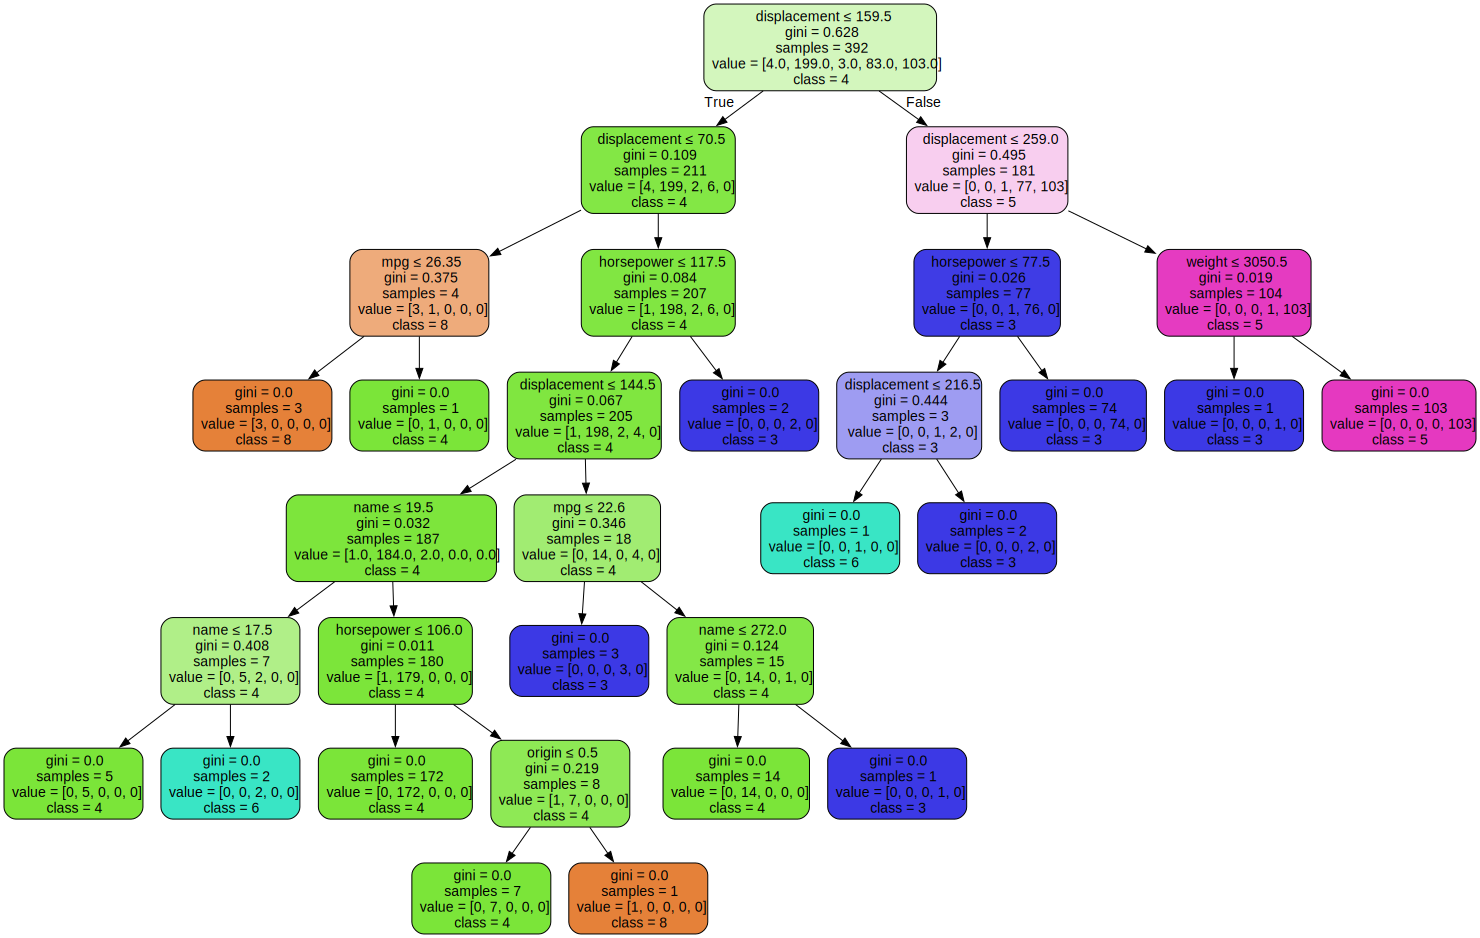

In [168]:
import graphviz
from sklearn.tree import export_graphviz

class_names = [str(name) for name in ds_y.unique()]

dot_data = export_graphviz(tree_cl, out_file=None,
                           feature_names=ds_x.columns,
                           class_names=class_names,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph


In [169]:
pred_y_test_tree = tree_cl.predict(X_test)

In [170]:
accuracy_score(y_test, pred_y_test_tree)

1.0

In [171]:
recall_score(y_test, pred_y_test, average='macro')

0.9702380952380952

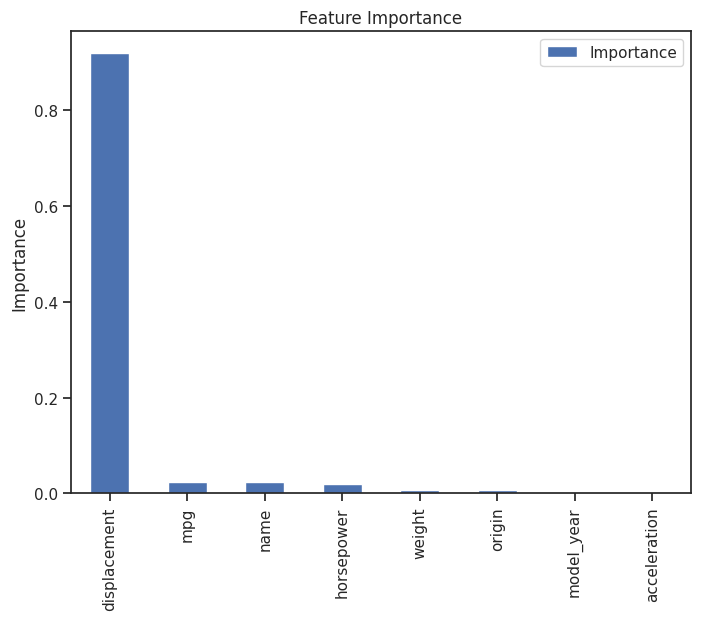

In [172]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагается, что model - это ваша обученная модель DecisionTreeClassifier
# и features_train - это DataFrame с признаками, использованными для обучения модели

# Получаем важность признаков
feature_importances = tree_cl.feature_importances_

# Создаем DataFrame с важностью признаков
feat_importances = pd.DataFrame(feature_importances, index=ds_x.columns, columns=["Importance"])

# Сортируем признаки по важности
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Построение графика
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()
